In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import animation

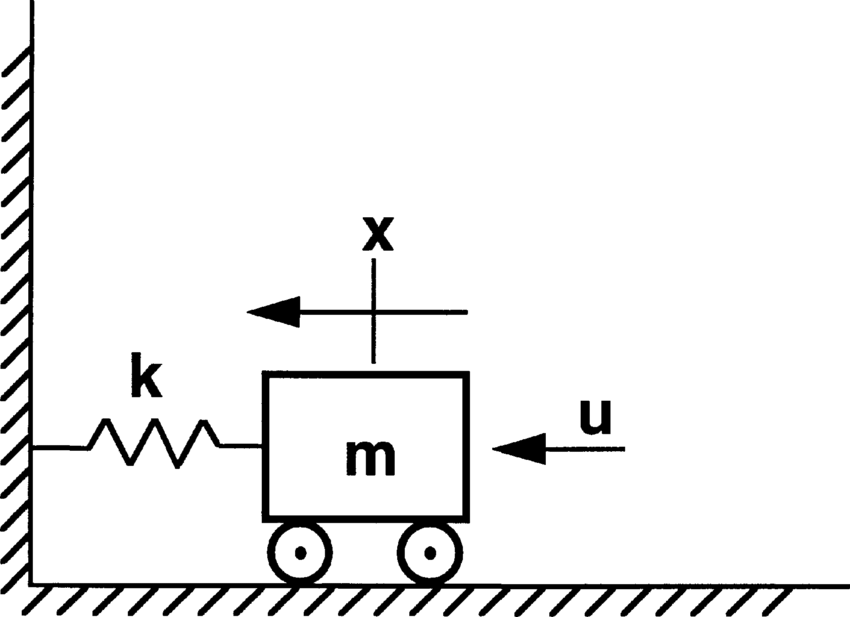

In [ ]:
t = smp.symbols('t')
m1 = smp.symbols('m')
k = smp.symbols('k')

In this case our generalised coordinates are $x$ and $\theta$

In [ ]:
x = smp.symbols(r'x', cls=smp.Function)

Explicitly write them as functions of time $t$:

In [ ]:
x = x(t)

Find the derivatives: $\dot\theta$, $\ddot\theta$, $\dot x$, $\ddot x$

In [ ]:
x_d = smp.diff(x, t)
x_dd = smp.diff(x_d, t)

Express kinetic and potential energy in terms of the generalised coordinates

In [ ]:
# Kinetic energy: 1/2 M * V * V
T = 1/2* m1 *(smp.diff(x,t))**2

# Potential energy: m*g*h
V = 1/2*k*(x)**2

L = T - V

Get Lagrnage's Equations: 
$$ \frac{\partial L}{\partial x} - \frac{d}{dt}\frac{\partial L}{\partial \dot x} = 0   $$

In [ ]:
L

In [ ]:
LE = smp.diff(L,x) - smp.diff(smp.diff(L,x_d),t).simplify()

In [ ]:
LE

In [ ]:
sols = smp.solve(LE,x_dd, simlpify=True, rational=False)

In [ ]:
sols[0]

With the solution for the equations of motion of the system, undo the symbolic expression and perform integration. We now have an equation dependant on $\dot\theta$ and other parameters, we have indeed two equations (symilar to state space representation). In this case we will assume $z_1 = \dot\theta_1$.

In [ ]:
dz2dt_f = smp.lambdify((t,m1,k,x,x_d),sols[0])
dxdt_f = smp.lambdify(x_d,x_d)

Define a functions to solve for the system of ODEs

In [ ]:
def dSdt(S,t,m1,k):
    x, z2 = S
    return [dxdt_f(z2), dz2dt_f(t,m1,k,x,z2)]

In [ ]:
t_final = 10
frms = 25*t_final
t = np.linspace(0,10,frms)
m1 = 0.5
k = 10
ans = odeint(dSdt, y0 =[0,-2], t=t, args=(m1,k))

In [ ]:
x, y = ans[:,0], np.zeros(len(ans[:,0]))
fig, ax = plt.subplots(1,1,figsize=(8,8))
def update(i):
# clear the axis each frame
    ax.clear()
    # replot things
    ax.scatter(x[i],y[i],s = 20, c = 'r')
    
    ax.plot([0,x[i]],[0,y[i]],c= 'r',linestyle='--')
    lim = 4
    ax.set_xlim((-lim, lim))
    ax.set_ylim((-lim, lim))

ani = animation.FuncAnimation(fig, update, frames=frms, interval=1)
ani.save('Spring_mass.gif',writer='pillow',fps=25)
